In [15]:
from matplotlib import pyplot as plt
import utils
import numpy
import tqdm # progress bar

In [16]:
def plot_scatter(x_iterable, y_iterable, x_label = "", y_label = ""):
    x_array = numpy.array(x_iterable)
    y_array = numpy.array(y_iterable)
    plt.scatter(x_array, y_array)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = numpy.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

In [17]:
def square_trick(bias, slope, predictor, current_value, learning_rate):
    """
    y ~ bias + slope*predictor

    Performs increments wrt a scaled value and difference
    """
    predicted_value = bias + slope*predictor
    slope += learning_rate*predictor*(current_value-predicted_value)
    bias += learning_rate*(current_value-predicted_value)
    return slope, bias

In [18]:
def rmse(labels, predictions):
    """ The root mean square error function """
    n = len(labels)
    differences = numpy.subtract(labels, predictions)
    return numpy.sqrt(1.0/n * (numpy.dot(differences, differences)))

# We want to be able to use different tricks, so we pass the function as a parameter
def perform_one_epoch(bias, slope, predictor, current_value, trick_function, learning_rate, ):
    """
    There's probably a better way to do this with kwargs
    """
    if learning_rate:
        slope, bias = trick_function(
            bias, slope, predictor, current_value, learning_rate=learning_rate)
    else:
        slope, bias = trick_function(
            bias, slope, predictor, current_value)
    return slope, bias

def linear_regression(
        features,
        labels,
        trick_function = square_trick,
        learning_rate=0.01,
        error_metric = rmse, # error function as parameter
        epochs = 1000,
        plot_all_epochs = True):
    """
    trick_function must follow y ~ b0 + b1x with parameters:
        bias,
        slope,
        predictor,
        current_value,
        learning_rate (optional for simple_trick)
    error_metric must take two arrays and return a scalar

    """
    slope = numpy.random.random()
    bias = numpy.random.random()
    errors = [] # logging errors
    for epoch in tqdm.tqdm(range(epochs)):
        if plot_all_epochs:
            draw_line(slope, bias, starting=min(features)-1, ending=max(features)+1)

        # Scoring predictions and storing error
        predictions = features[0]*slope+bias
        errors.append(error_metric(labels, predictions))

        index_random = numpy.random.randint(0, len(features)-1)
        predictor = features[index_random]
        current_value = labels[index_random]
        slope, bias = perform_one_epoch(
            bias, slope, predictor, current_value, trick_function, learning_rate)
    draw_line(slope, bias, 'red', starting=0, ending=9)
    plot_scatter(features, labels)
    plt.show()
    # plotting error
    plot_scatter(range(len(errors)), errors, "Number of Epochs", "Numerical Error")
    plt.show()

    return slope, bias

In [19]:
import numpy as np

features = np.array([1,2,3,5,6,7])
labels = np.array([100, 155, 195, 250, 305, 345])
print(features)
print(labels)

[1 2 3 5 6 7]
[100 155 195 250 305 345]


100%|██████████| 100/100 [00:00<00:00, 4246.58it/s]


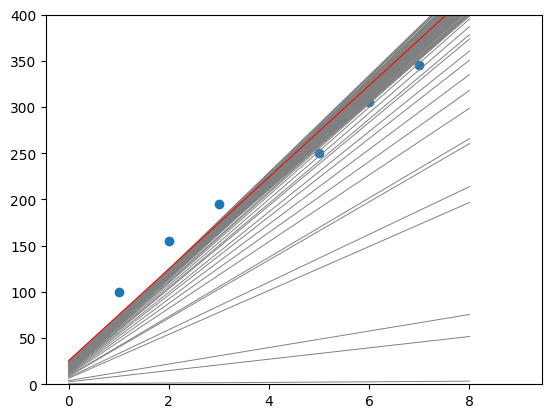

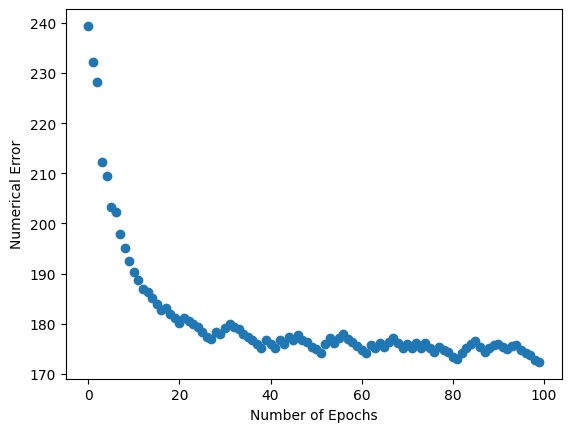

Наклон 49.64039762192441
Смещение: 25.6460146593144


In [20]:
# This line is for the x-axis to appear in the figure
plt.ylim(0,400)

slope, bias = linear_regression(features, labels, learning_rate = 0.01, epochs = 100)
print("Наклон", slope)
print("Смещение:", bias)